<a href="https://colab.research.google.com/github/neerajgosai19/data-science/blob/master/Car_Detection_with_OpenCV_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import urllib.request ## import to download image
import cv2 ## import the OpenCV library
print(cv2.__version__)

from matplotlib import pyplot as plt ## import for plotting graphs
from matplotlib import rcParams as rcParams
%matplotlib inline


4.1.2


In [2]:
image_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/CV0101/Dataset/car-road-behind.jpg"
image_name = "car-road-behind.jpg"

urllib.request.urlretrieve(image_url, image_name)

('car-road-behind.jpg', <http.client.HTTPMessage at 0x7f8bdb6c6710>)

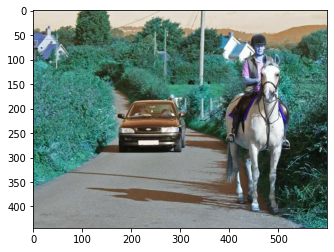

In [3]:
car = cv2.imread(image_name)

plt.imshow(car)

In [4]:
## create a function that cleans up and displays the image
def plt_show(image, title="", gray = False, size = (12,10)):
    from pylab import rcParams
    temp = image 
    
    #fix colour
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    
    #change image size
    rcParams['figure.figsize'] = [10,10]
    #remove axes ticks
    plt.axis("off")
    plt.title(title)
    plt.imshow(temp, cmap='gray')
    plt.show()

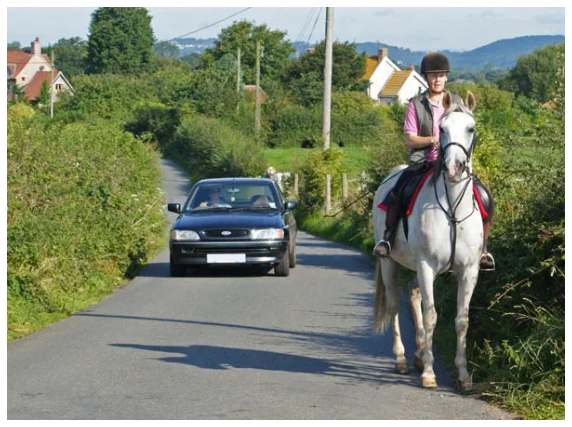

In [5]:
plt_show(car)

In [6]:
haarcascade_url = 'https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml'
haar_name = "cars.xml"
urllib.request.urlretrieve(haarcascade_url, haar_name)

('cars.xml', <http.client.HTTPMessage at 0x7f8bd8d07ef0>)

In [29]:
detector = cv2.CascadeClassifier("cars.xml")

In [31]:
cars_list = detector.detectMultiScale(car)
print(cars_list)
cars_list

()


()

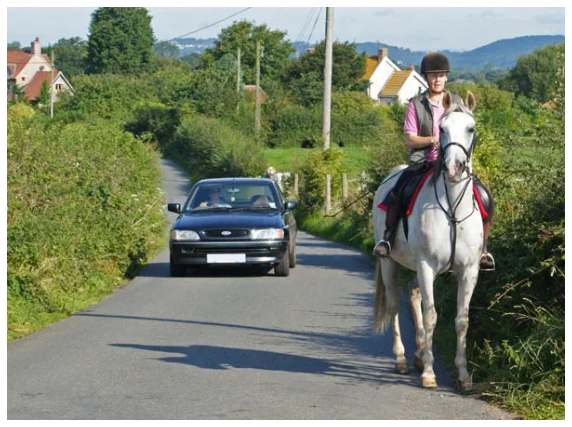

In [23]:
def detect_cars(image):
    ## create a temp image to be used to avoid altering the original one
    temp = image
    
    
    #convert the temp image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    
    #detect cars on the gray image
    cars_list = detector.detectMultiScale(gray_image)
    
    print("Number of cars detected: " + str(len(cars_list)))
    print("cars_list: " + str(cars_list))
    
    #for each car detected, draw a rectangle around it
    for car in cars_list: 
        (x, y, w, h) = car
        cv2.rectangle(temp, (x, y), (x + w, y + h), (0, 255, 0), 4) 
    
    plt_show(temp) 

Number of cars detected: 0
cars_list: ()


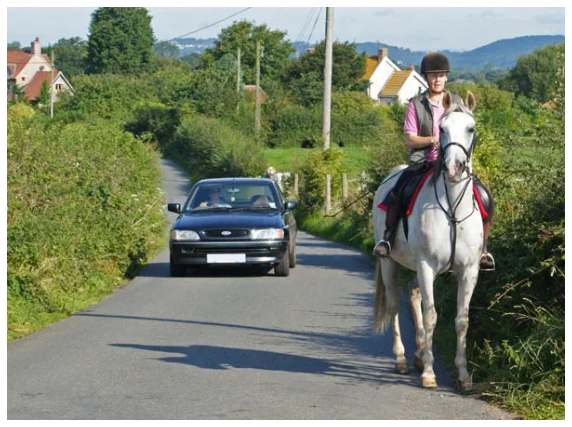

In [24]:
car = cv2.imread("car-road-behind.jpg")

detect_cars(car)

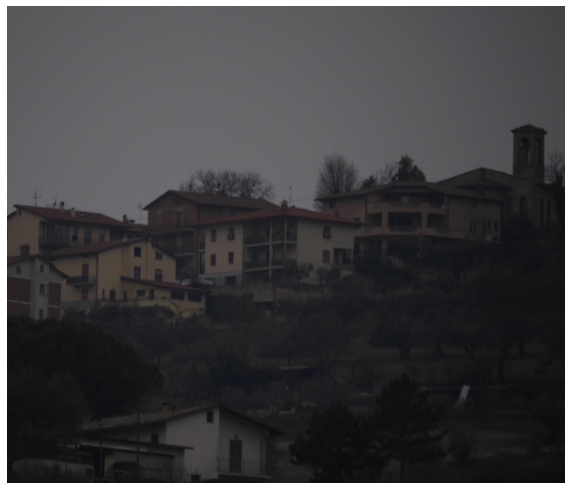

In [32]:
##get underexposed photo from this URL
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/9/94/Underexposed_photo.JPG", "underexposed.jpg")
underexposed = cv2.imread('underexposed.jpg')
plt_show(underexposed)

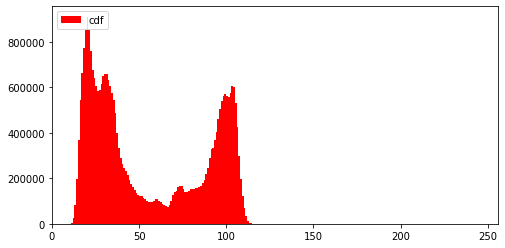

In [34]:
#From: http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html
import numpy as np 
from pylab import rcParams
rcParams['figure.figsize'] = 8,4
hist,bins = np.histogram(underexposed.flatten(),256,[0,256])
plt.hist(underexposed.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

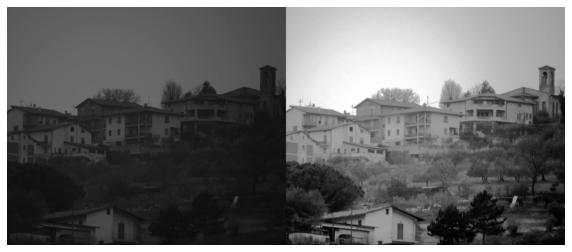

In [35]:
#Convert to grayscale
underexposed_gray = cv2.cvtColor(underexposed, cv2.COLOR_BGR2GRAY)

#equalizeHist
underexposed_equ = cv2.equalizeHist(underexposed_gray)

#stacking images side-by-side to view them
res = np.hstack((underexposed_gray , underexposed_equ))

#cv2.imwrite('res.png',res)
plt_show(res , gray = True)


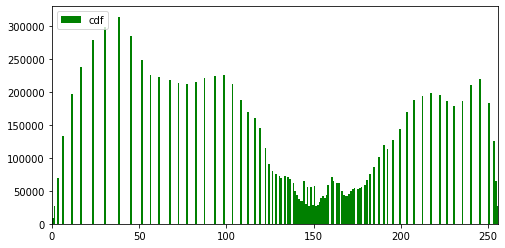

In [38]:
rcParams['figure.figsize'] = 8,4
hist,bins = np.histogram(underexposed_equ.flatten(),256,[0,256])
plt.hist(underexposed_equ.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [39]:
urllib.request.urlretrieve("https://storage.needpix.com/rsynced_images/toronto-1267833_1280.jpg", "cn.jpg")

('cn.jpg', <http.client.HTTPMessage at 0x7f8bd7e09c88>)

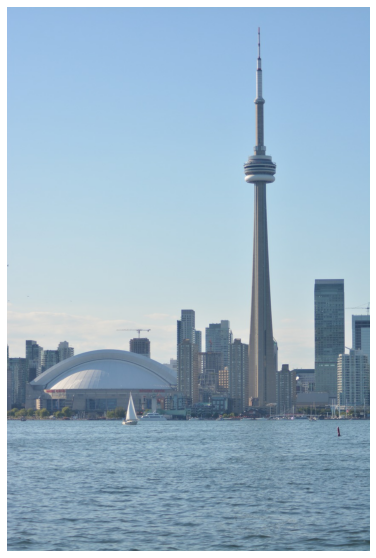

In [40]:
cn = cv2.imread('cn.jpg')
plt_show(cn)


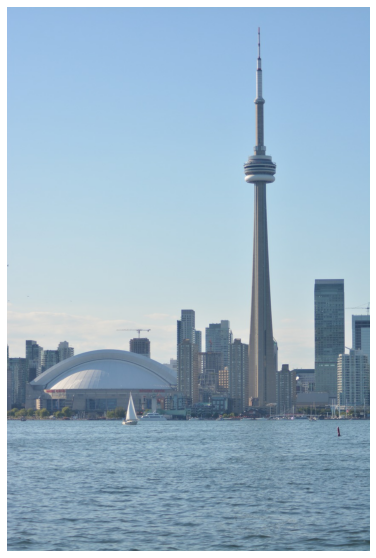

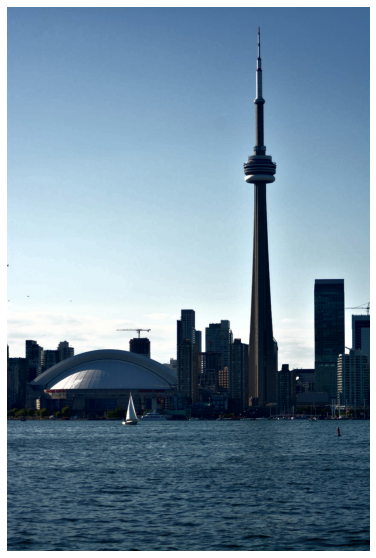

In [41]:
# Equalizing histograms of coloured images:
# From: https://www.packtpub.com/mapt/book/application_development/9781785283932/2/ch02lvl1sec26/enhancing-the-contrast-in-an-image

img_yuv = cv2.cvtColor(cn, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


plt_show(cn)
plt_show(img_equalized)

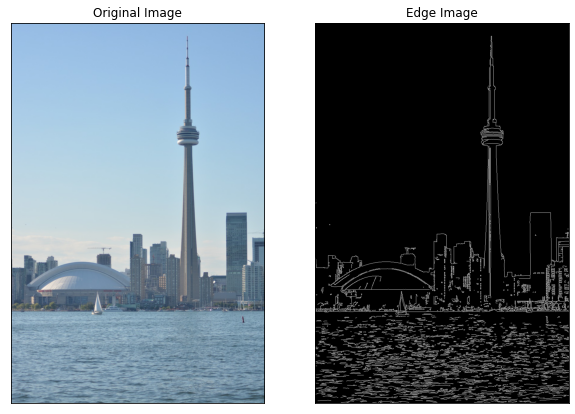

In [42]:
cn = cv2.imread("cn.jpg")
img = cv2.cvtColor(cn, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()